In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ilinet = pd.read_csv('Data/ILINet.csv', header=1)
clinical = pd.read_csv('Data/WHO_NREVSS_Clinical_Labs.csv', header=1)
public = pd.read_csv('Data/WHO_NREVSS_Public_Health_Labs.csv', header=1)

In [3]:
ilinet.head(20)

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2022,40,2.61928,2.59379,18503,10718,X,20141,4094,3862,57318,3684,2209814
1,National,X,2022,41,2.97342,2.85133,20623,11519,X,22779,4394,4073,63388,3720,2223106
2,National,X,2022,42,3.33747,3.31688,23713,13719,X,28368,5303,4512,75615,3726,2279700
3,National,X,2022,43,4.40914,4.44660,32012,19586,X,45003,7037,5858,109496,3788,2462467
4,National,X,2022,44,5.46044,5.54702,37474,25460,X,61015,8469,6829,139247,3776,2510305
5,National,X,2022,45,5.77391,5.67263,38651,26941,X,57053,9791,7619,140055,3793,2468962
6,National,X,2022,46,5.95367,5.73531,34849,28672,X,55229,10171,8498,137419,3777,2396019
7,National,X,2022,47,7.46674,7.37142,39539,36157,X,62925,13876,12439,164936,3765,2237505
8,National,X,2022,48,7.22916,7.24012,38495,48042,X,63623,18626,16887,185673,3767,2564503
9,National,X,2022,49,6.83803,6.82928,32316,40778,X,62563,16557,15034,167248,3750,2448985


In [4]:
ilinet.columns

Index(['REGION TYPE', 'REGION', 'YEAR', 'WEEK', '% WEIGHTED ILI',
       '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS'],
      dtype='object')

In [5]:
# Add column that counts from 1-52 
ilinet['Week_Adjusted'] = np.arange(1,53)

In [6]:
ilinet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,Week_Adjusted
0,National,X,2022,40,2.61928,2.59379,18503,10718,X,20141,4094,3862,57318,3684,2209814,1
1,National,X,2022,41,2.97342,2.85133,20623,11519,X,22779,4394,4073,63388,3720,2223106,2
2,National,X,2022,42,3.33747,3.31688,23713,13719,X,28368,5303,4512,75615,3726,2279700,3
3,National,X,2022,43,4.40914,4.44660,32012,19586,X,45003,7037,5858,109496,3788,2462467,4
4,National,X,2022,44,5.46044,5.54702,37474,25460,X,61015,8469,6829,139247,3776,2510305,5


<Axes: xlabel='WEEK', ylabel='TOTAL PATIENTS'>

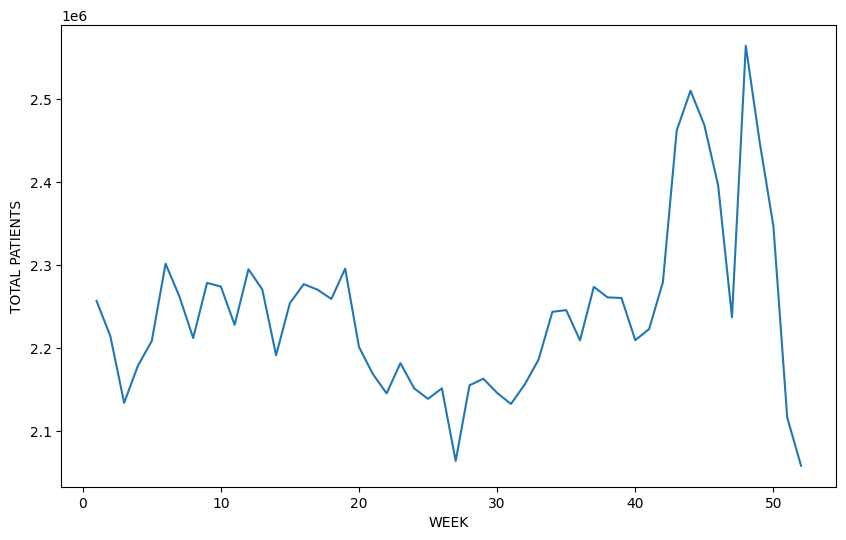

In [7]:
# plot the data points start at 40 and end at 39 
# plt.plot(ilinet['Week_Adjusted'], ilinet['TOTAL PATIENTS'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='WEEK', y='TOTAL PATIENTS', data=ilinet)

In [8]:
public.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,National,X,2022,40,9129,39,239,19,3,5,0,0
1,National,X,2022,41,8523,66,364,23,3,5,0,0
2,National,X,2022,42,9405,114,449,33,4,6,0,1
3,National,X,2022,43,9449,230,706,51,2,3,0,0
4,National,X,2022,44,10311,316,917,175,4,5,0,0


In [9]:
public['TOTAL POSITIVE'] = public['A (2009 H1N1)'] + public['A (H3)'] + public['A (Subtyping not Performed)'] + public['B'] + public['BVic'] + public['BYam'] + public['H3N2v']

In [10]:
public['Week_Adjusted'] = np.arange(1,53)

In [11]:
clinical.head()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,National,X,2022,40,78249,1984,105,2.66968,2.53550,0.134187
1,National,X,2022,41,88055,2961,88,3.46261,3.36267,0.099937
2,National,X,2022,42,95427,5080,108,5.43662,5.32344,0.113176
3,National,X,2022,43,112851,9341,113,8.37742,8.27729,0.100132
4,National,X,2022,44,133627,16953,145,12.79530,12.68680,0.108511


In [12]:
clinical['TOTAL POSITIVE'] = clinical['TOTAL A'] + clinical['TOTAL B']
clinical['Week_Adjusted'] = np.arange(1,53)

<Axes: xlabel='Week_Adjusted', ylabel='TOTAL POSITIVE'>

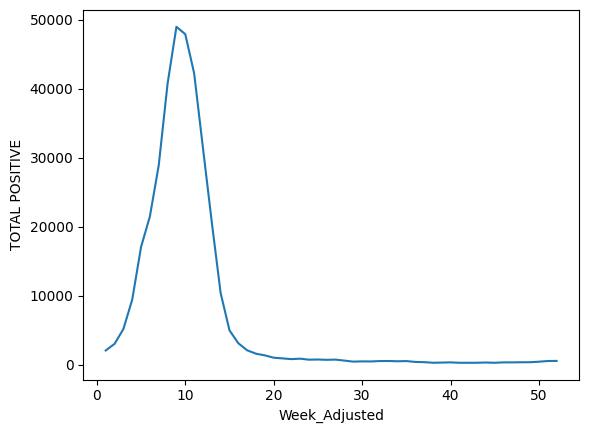

In [13]:
sns.lineplot(x='Week_Adjusted', y='TOTAL POSITIVE', data=clinical)

#### Baseline Model

In [14]:
total_people = clinical['TOTAL SPECIMENS'].iloc[:52]
total_infected = clinical['TOTAL POSITIVE'].iloc[:52]
total_susceptible = total_people - total_infected

In [15]:
init_i = total_infected.iloc[0]
init_r = 0
init_s = total_susceptible.iloc[0]
init_conditions = [init_s, init_i, init_r]

In [16]:
from scipy.integrate import odeint

# Time frame
t = np.arange(1, len(clinical['WEEK']) + 1)

# Define the SIR model
def sir_model(y, t, beta, gamma):
    s, i, r = y
    n = s + i + r
    dsdt = -beta * (s * i) / n
    didt = (beta * (s * i) / n) - (gamma * i)
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Parameters
beta = 0.4
gamma = 0.2
parameters = (beta, gamma)

# Solve the ODE
solution = odeint(sir_model, init_conditions, t, args=parameters)

In [17]:
solution

array([[76160.        ,  2089.        ,     0.        ],
       [75270.53816358,  2518.84318522,   459.6186512 ],
       [74214.47034069,  3022.095533  ,  1012.4341263 ],
       [72970.5748066 ,  3604.67456619,  1673.75062721],
       [71519.0925076 ,  4270.07395676,  2459.83353564],
       [69843.63677862,  5018.06547129,  3387.29775009],
       [67933.4730528 ,  5843.30314014,  4472.22380706],
       [65785.95367711,  6734.04408353,  5729.00223936],
       [63408.75124334,  7671.29033833,  7168.95841833],
       [60821.42369798,  8628.69925969,  8798.87704233],
       [58055.83176353,  9573.55719613, 10619.61104034],
       [55155.05846176, 10468.9376808 , 12625.00385744],
       [52170.76411915, 11276.8847577 , 14801.35112315],
       [49159.27581397, 11962.15901739, 17127.56516864],
       [46177.03755378, 12495.87260542, 19576.0898408 ],
       [43276.2090382 , 12858.31881604, 22114.47214576],
       [40501.13147835, 13040.49349636, 24707.37502528],
       [37886.11729249, 13044.1

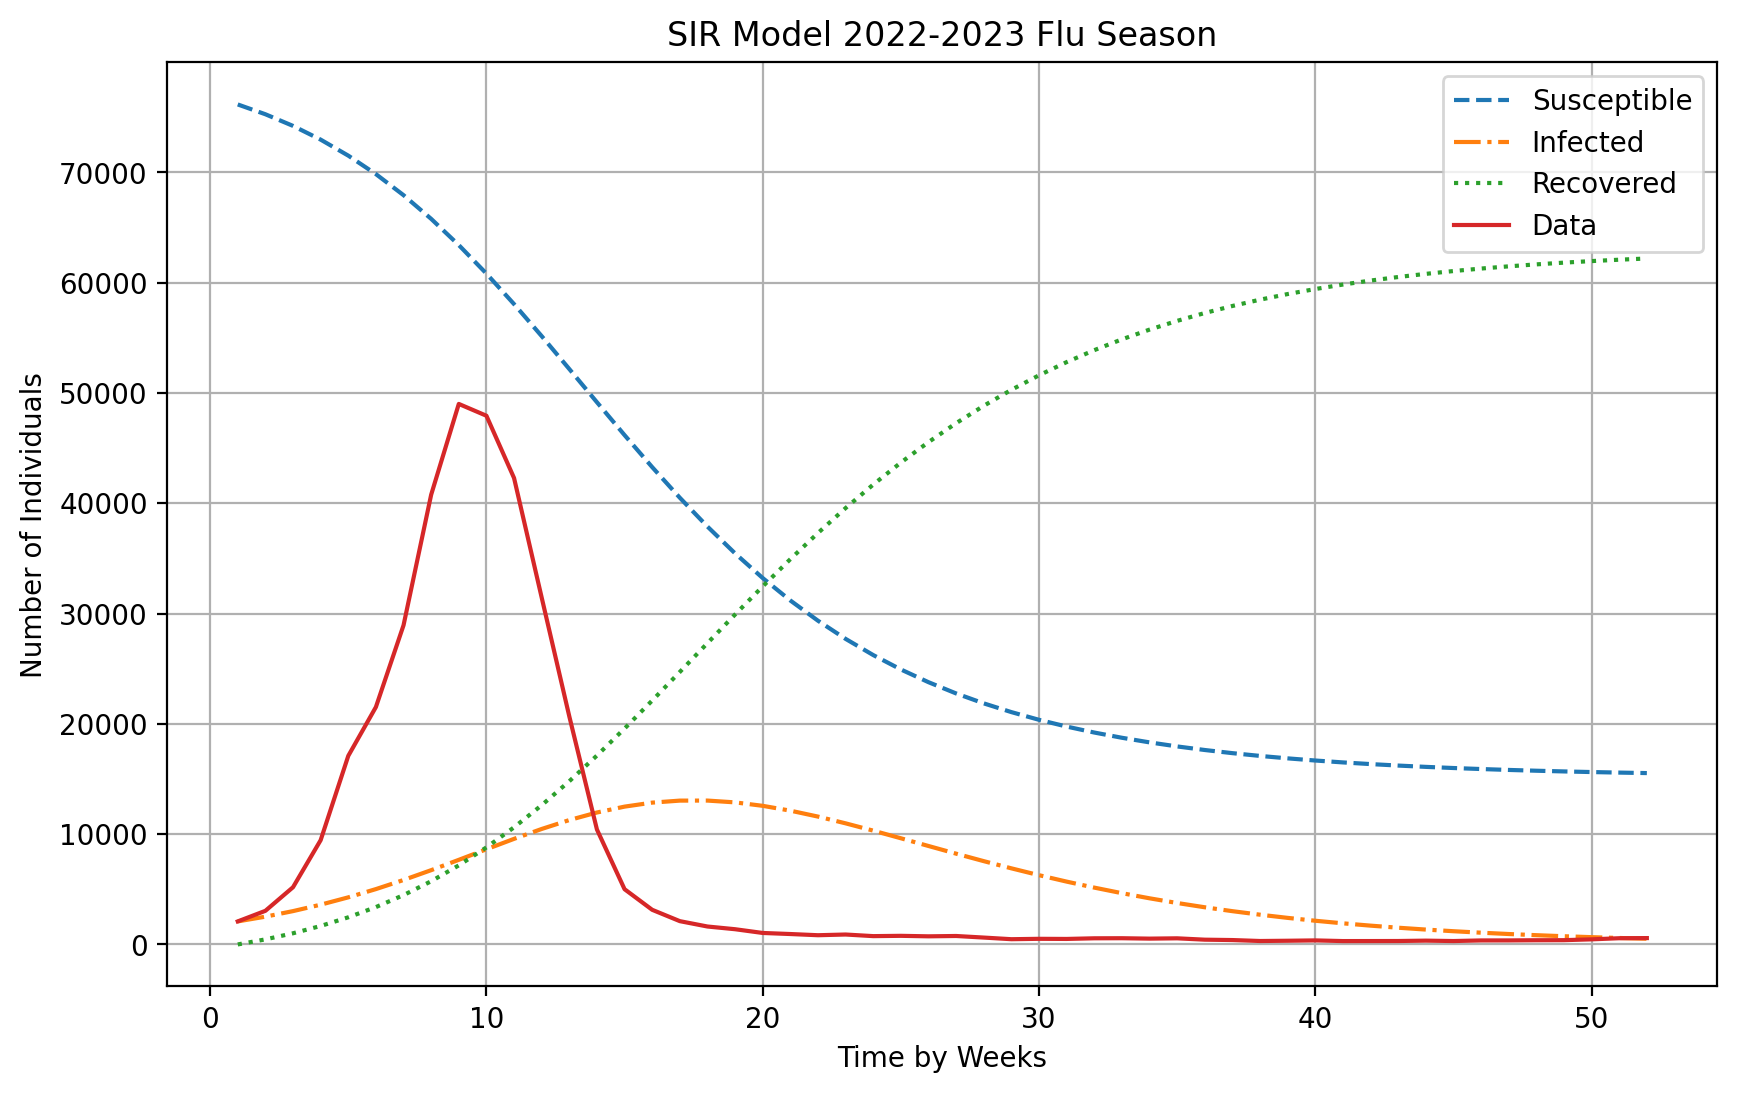

In [18]:
# Plot the results
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, total_infected, label='Data', linestyle='-')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('SIR Model 2022-2023 Flu Season')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Calculate the sum of squared error
baseline_sse = np.sum((solution[:, 1] - total_infected) ** 2)
print(baseline_sse)

# Calculate the mse for the model
baseline_mse = np.mean((solution[:, 1] - total_infected) ** 2)
print(baseline_mse)

# Caluclate the rmse for the model
baseline_rmse = np.sqrt(baseline_mse)
print(baseline_rmse)

8572474853.688824
164855285.647862
12839.598344491233


#### Find the Optimal Parameters (For Loop)

In [20]:
# itertare over the beta and gamma values to find the best fit
best_fit = None
errors = []
best_error = float('inf')
for beta in np.linspace(0, 2, 100):
    for gamma in np.linspace(0, 2, 100):
        parameters = (beta, gamma)
        solution = odeint(sir_model, init_conditions, t, args=parameters)
        error = np.sum(np.square(solution[:, 1] - total_infected))
        errors.append(error)
        if error < best_error:
            best_error = error
            best_fit = (beta, gamma)

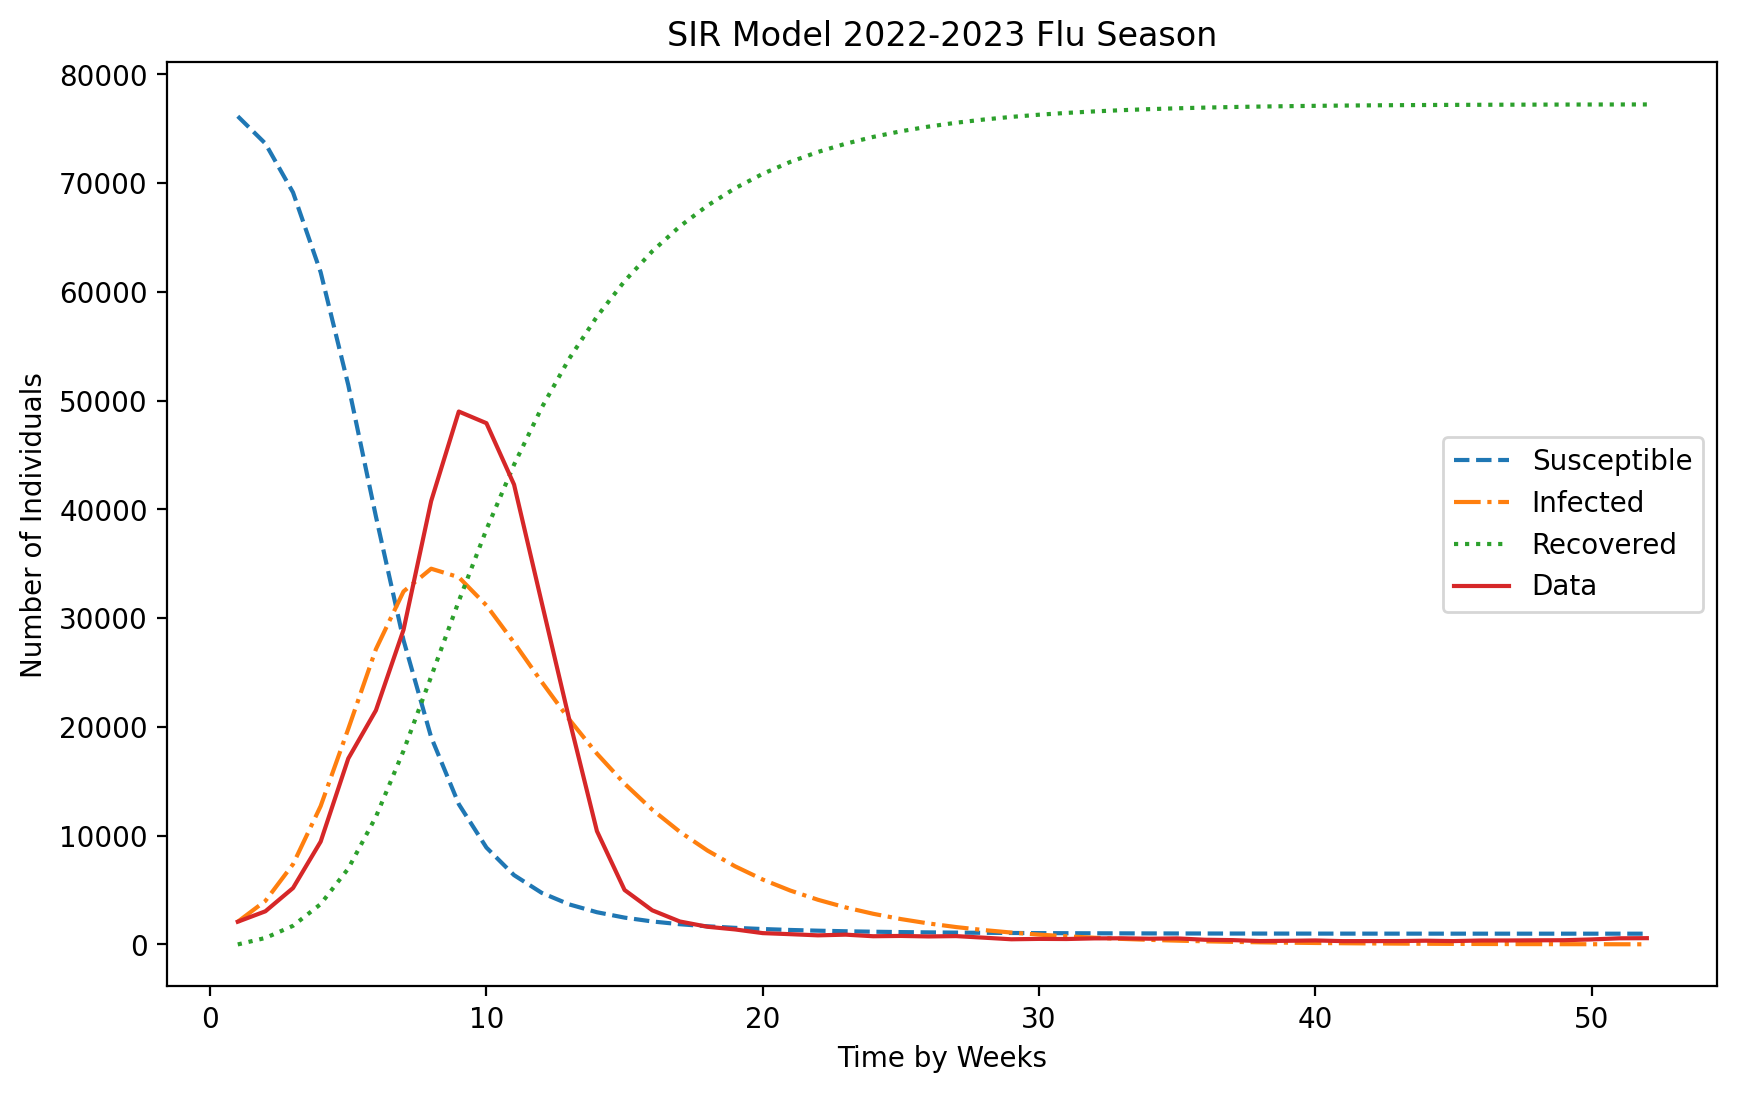

In [21]:
# plot the best fit
parameters = best_fit
solution = odeint(sir_model, init_conditions, t, args=parameters)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, total_infected, label='Data', linestyle='-')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('SIR Model 2022-2023 Flu Season')
plt.legend()

#### Find the Optimal Parameters (scipy.optimize)

In [22]:
from scipy.optimize import curve_fit

# Define the SIR model function again
def sir_model_opt(t, beta, gamma):
    def derivative(y, t):
        s, i, r = y
        n = s + i + r
        dsdt = -beta * (s * i) / n
        didt = (beta * (s * i) / n) - (gamma * i)
        drdt = gamma * i
        return [dsdt, didt, drdt]
    return odeint(derivative, init_conditions, t)

# Define the error function
def error_func(t, *params):
    beta, gamma = params
    model = sir_model_opt(t, beta, gamma)[:, 1]
    return np.sum(np.square(model - total_infected))

# Initial guess for parameters
initial_guess = [0.4, 0.2]

# Fit the model to the data
optimal_params, _ = curve_fit(error_func, t, total_infected, p0=initial_guess)

# Extract the optimal parameters
optimal_beta, optimal_gamma = optimal_params

print("Optimal beta:", round(optimal_beta, 4))
print("Optimal gamma:", round(optimal_gamma, 4))

/usr/local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_53386/3347282405.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  dsdt = -beta * (s * i) / n
/var/folders/6v/d4ttnwgs14q94mgg08fjyd6r0000gn/T/ipykernel_53386/3347282405.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  didt = (beta * (s * i) / n) - (gamma * i)


Optimal beta: 0.8809
Optimal gamma: 0.1948


/usr/local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


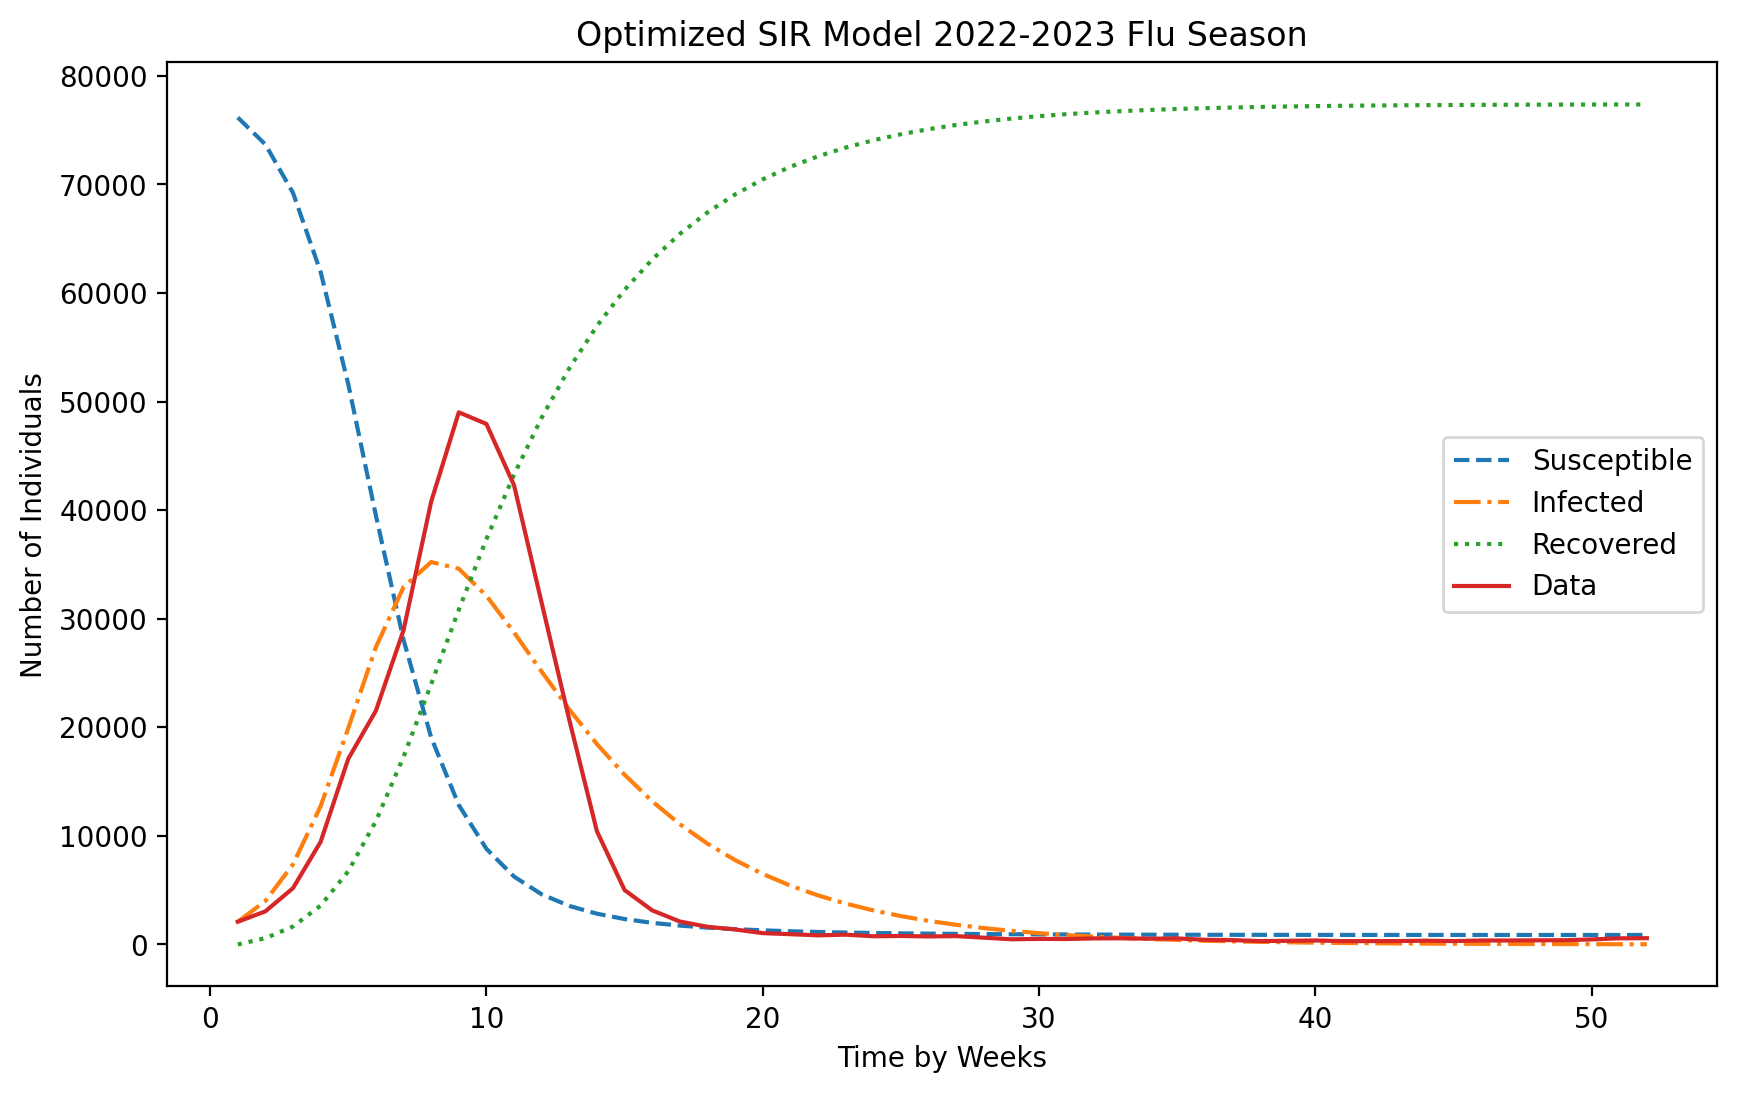

In [23]:
# plot the optimal fit
solution = sir_model_opt(t, optimal_beta, optimal_gamma)
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(t, solution[:, 0], label='Susceptible', linestyle='--')
plt.plot(t, solution[:, 1], label='Infected', linestyle='-.')
plt.plot(t, solution[:, 2], label='Recovered', linestyle=':')
plt.plot(t, total_infected, label='Data', linestyle='-')
plt.xlabel('Time by Weeks')
plt.ylabel('Number of Individuals')
plt.title('Optimized SIR Model 2022-2023 Flu Season')
plt.legend()

In [24]:
# Parameters
parameters = (optimal_beta, optimal_gamma)

# Solve the ODE
solution = odeint(sir_model, init_conditions, t, args=parameters)

In [25]:
# Calculate the sum of squared error
optimal_sse = np.sum((solution[:, 1] - total_infected) ** 2)
print(optimal_sse)

# Calculate the mse for the model
optimal_mse = np.mean((solution[:, 1] - total_infected) ** 2)
print(optimal_mse)

# Caluclate the rmse for the model
optimal_rmse = np.sqrt(optimal_mse)
print(optimal_rmse)

1333534065.1436934
25644885.86814795
5064.077987960686
